In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, linear_model, svm, neighbors
from datetime import timedelta, datetime, date
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv('WIKI-AAPL.csv', index_col=0)

display(data.head())
display(data.tail())

,open,high,low,close,volume,ex_dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
2016-09-06,107.90,108.3000,107.51,107.68,24354375.0,0.0,1.0,107.90,108.3000,107.51,107.68,24354375.0
2016-09-02,107.70,108.0000,106.82,107.73,26802450.0,0.0,1.0,107.70,108.0000,106.82,107.73,26802450.0
2016-09-01,106.14,106.8000,105.62,106.73,26701523.0,0.0,1.0,106.14,106.8000,105.62,106.73,26701523.0
2016-08-31,105.66,106.5699,105.64,106.10,29662406.0,0.0,1.0,105.66,106.5699,105.64,106.10,29662406.0
2016-08-30,105.80,106.5000,105.50,106.00,24863945.0,0.0,1.0,105.80,106.5000,105.50,106.00,24863945.0


,open,high,low,close,volume,ex_dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.398490,0.400286,0.398490,0.398490,18362400.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.387117,0.389063,0.387117,0.387117,21610400.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.379635,0.379635,0.377840,0.377840,26432000.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.409713,0.409713,0.407768,0.407768,43971200.0
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.430213,0.432009,0.430213,0.430213,117258400.0


In [3]:
def summary(df):
    '''Provide summary of relevant statistics for some given feature'''
    
    df = df.iloc[:,0]
    n_obs = df.count()
    mean = df.mean()
    median = df.median()
    std = df.std()
    skew = df.skew()
    kurt = df.kurt()
    min = df.min()
    argmin = df.argmin()
    max = df.max()
    argmax = df.argmax()
    q3, q1 = np.percentile(df.dropna(), [75, 25])
    iqr = q3 - q1
    outlier_lb = q1 - iqr * 1.5
    outlier_ub = q3 + iqr * 1.5
    major_outlier_lb = q1 - iqr * 3
    major_outlier_ub = q3 + iqr * 3
    is_outlier = (df.dropna() < outlier_lb) | (df.dropna() > outlier_ub)
    is_major_outlier = (df.dropna() < major_outlier_lb) | \
                       (df.dropna() > major_outlier_ub) 
    n_outliers = is_outlier.sum()
    n_major_outliers = is_major_outlier.sum()
    n_minor_outliers = n_outliers - n_major_outliers

    values = [mean, median, std, skew, kurt, min, argmin, max, argmax, q1, q3,
              iqr, outlier_lb, outlier_ub, major_outlier_lb, major_outlier_ub,
              n_obs, n_outliers, n_major_outliers, n_minor_outliers] 

    labels = ['mean', 'median', 'std', 'skew', 'kurt', 'min', 'argmin', 'max',
              'argmax', 'q1', 'q3', 'iqr', 'outlier_lb', 'outlier_ub',
              'major_outlier_lb', 'major_outlier_ub', 'n_obs', 'n_outliers',
              'n_major_outliers', 'n_minor_outliers']

    summary = pd.DataFrame(values, labels, ['value'])

    return summary

volumes = data['adj_volume']

display(summary(pd.DataFrame(volumes)))

,value
mean,9.11281e+07
median,6.34424e+07
std,8.79905e+07
skew,3.38451
kurt,28.3175
min,250376
argmin,1985-09-27
max,1.85541e+09
argmax,2000-09-29
q1,3.65582e+07


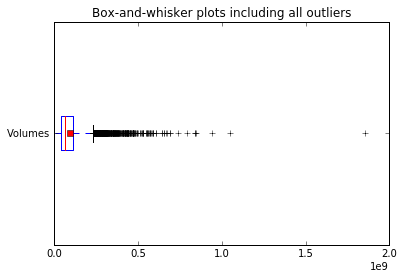

In [4]:
# box and whisker plots
# showing all outliers
plt.boxplot(volumes, vert=False, labels=['Volumes'], showmeans=True)
plt.title('Box-and-whisker plots including all outliers')
plt.show()

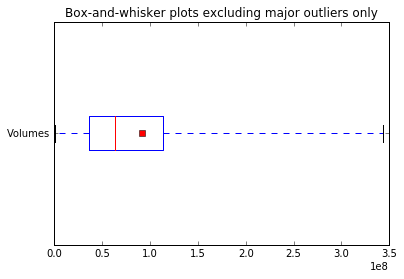

In [5]:
# ignoring major outliers only
plt.boxplot(volumes, vert=False, labels=['Volumes'], showmeans=True,
            showfliers=False, whis=3)
plt.title('Box-and-whisker plots excluding major outliers only')
plt.show()

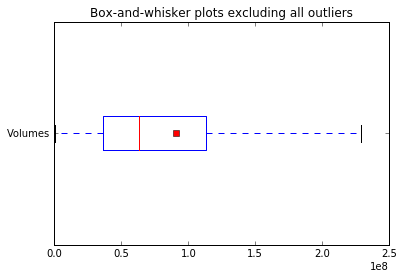

In [6]:
# ignoring all outliers
plt.boxplot(volumes, vert=False, labels=['Volumes'], showmeans=True,
            showfliers=False)
plt.title('Box-and-whisker plots excluding all outliers')
plt.show()

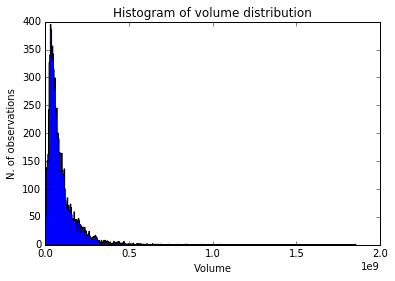

In [7]:
# histogram of volume distribution
plt.hist(volumes, bins=500, histtype='stepfilled')
plt.xlabel('Volume')
plt.ylabel('N. of observations')
plt.title('Histogram of volume distribution')
plt.show()

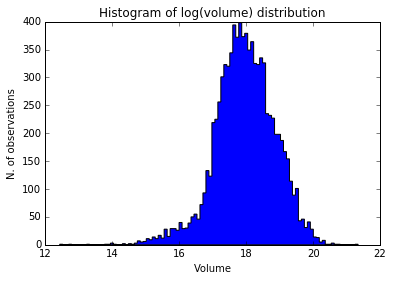

In [8]:
# histogram of log(volume) distribution
plt.hist(np.log(volumes), bins=100, histtype='stepfilled')
plt.xlabel('Volume')
plt.ylabel('N. of observations')
plt.title('Histogram of log(volume) distribution')
plt.show()

In [9]:
data = data.reindex(index=data.index[::-1])
data = data[['adj_close', 'adj_volume']]

daily_returns = data['adj_close'] / data['adj_close'].shift(1) - 1
daily_returns = pd.DataFrame(daily_returns)
daily_returns.columns = ['daily_returns']
data = data.join(daily_returns)

cumulative_returns = data['adj_close'] / data['adj_close'][0] - 1
cumulative_returns = pd.DataFrame(cumulative_returns)
cumulative_returns.columns = ['cumulative_returns']
data = data.join(cumulative_returns)

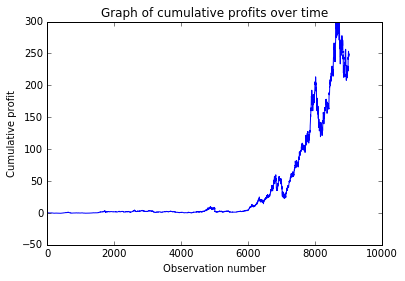

In [10]:
# plot line chart of cumulative returns
# remember to put dates on x axis
plt.plot(data['cumulative_returns'].values)
plt.title('Graph of cumulative profits over time')
plt.xlabel('Observation number')
plt.ylabel('Cumulative profit')

plt.show()

In [11]:
# for every dollar invested in Apple stock on 12th Dec 1980 (beginning of the
# period), you would made a profit of 249.29$
final_pnl = data['cumulative_returns'][-1]

# avg annual return = avg daily return * number of trading days in a year
avg_annual_return = data['daily_returns'].mean() * 252

# avg annual std = daily std * sqrt(number of trading days in a year)
# we take the sqrt because
# std = sqrt(variance)
# annual variance = daily variance * 252
# annual std = sqrt(annual variance)
#            = sqrt(daily variance * 252)
#            = sqrt(daily variance) * sqrt(252)
#            = daily std * sqrt(252)
annual_std = data['daily_returns'].std() * np.sqrt(252)

cum_ret = data['cumulative_returns']
drawdowns = np.maximum.accumulate(cum_ret) - cum_ret
max_drawdown_valley = np.argmax(drawdowns)
max_drawdown_peak = np.argmax(cum_ret[:max_drawdown_valley])
max_drawdown = np.max(drawdowns)

avg_drawdown = np.mean(drawdowns)
median_drawdown = np.median(drawdowns)
q3_drawdown = np.percentile(drawdowns, 75)

# remember to compute recovery time from drawdowns

# risk-adjusted return measures
# all such measures are annualized here
# information ratio = sharpe ratio without taking risk-free rate into account
# using Narang's definition here, not Balch's - hence ignoring beta
information_ratio = avg_annual_return / annual_std

# sterling ratio = avg return / std of below average returns
below_avg_returns = daily_returns[daily_returns < daily_returns.mean()]
annual_below_avg_returns_std = below_avg_returns.std() * np.sqrt(252)
sterling_ratio = avg_annual_return / annual_below_avg_returns_std
sterling_ratio = sterling_ratio.values[0]

# adjusted sterling ratio = avg return / std of negative returns
negative_returns = daily_returns[daily_returns < 0]
annual_negative_returns_std = negative_returns.std() * np.sqrt(252)
adjusted_sterling_ratio = avg_annual_return / annual_negative_returns_std
adjusted_sterling_ratio = adjusted_sterling_ratio.values[0] 

calmar_ratio = avg_annual_return / max_drawdown

# omega ratio = sum of all positive returns / sum of all negative returns
positive_returns = daily_returns[daily_returns > 0]
omega_ratio = positive_returns.sum() / negative_returns.sum().abs()
omega_ratio = omega_ratio.values[0]

metrics_values = [final_pnl, avg_annual_return, annual_std, max_drawdown,
                  avg_drawdown, median_drawdown, information_ratio,
                  sterling_ratio, adjusted_sterling_ratio, calmar_ratio,
                  omega_ratio]

metrics_labels = ['final_pnl', 'avg_annual_return', 'annual_std', 'max_drawdown',
                  'avg_drawdown', 'median_drawdown', 'information_ratio',
                  'sterling_ratio', 'adjusted_sterling_ratio', 'calmar_ratio',
                  'omega_ratio']

metrics_df = pd.DataFrame(metrics_values, metrics_labels, ['value'])

display(metrics_df)

,value
final_pnl,249.294356
avg_annual_return,0.266496
annual_std,0.469047
max_drawdown,93.885701
avg_drawdown,8.065995
median_drawdown,2.314381
information_ratio,0.568165
sterling_ratio,0.801082
adjusted_sterling_ratio,0.796429
calmar_ratio,0.002839


In [12]:
momentum = data['adj_close'] / data['adj_close'].shift(5) - 1
momentum = pd.DataFrame(momentum)
momentum.columns = ['momentum']
data = data.join(momentum)

volumes = data['adj_volume']
volumes = pd.DataFrame(volumes)

momentum_by_volume = momentum * volumes.values
momentum_by_volume.columns = ['momentum_by_volume']
data = data.join(momentum_by_volume)

display(data.head())
display(data.tail())

,adj_close,adj_volume,daily_returns,cumulative_returns,momentum,momentum_by_volume
1980-12-12,0.430213,117258400.0,NaN,0.000000,NaN,NaN
1980-12-15,0.407768,43971200.0,-0.052174,-0.052174,NaN,NaN
1980-12-16,0.377840,26432000.0,-0.073394,-0.121739,NaN,NaN
1980-12-17,0.387117,21610400.0,0.024554,-0.100174,NaN,NaN
1980-12-18,0.398490,18362400.0,0.029378,-0.073739,NaN,NaN


,adj_close,adj_volume,daily_returns,cumulative_returns,momentum,momentum_by_volume
2016-08-30,106.00,24863945.0,-0.007676,245.389318,-0.026183,-651008.206247
2016-08-31,106.10,29662406.0,0.000943,245.621761,-0.017865,-529930.978247
2016-09-01,106.73,26701523.0,0.005938,247.086150,-0.007809,-208508.685693
2016-09-02,107.73,26802450.0,0.009369,249.410577,0.007387,197998.274733
2016-09-06,107.68,24354375.0,-0.000464,249.294356,0.008051,196075.290208


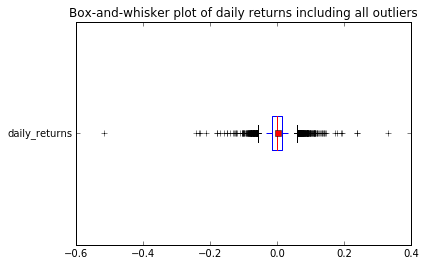

In [13]:
plt.boxplot(data['daily_returns'].dropna().values,
    vert=False,
    labels=['daily_returns'],
    showmeans=True)
plt.title('Box-and-whisker plot of daily returns including all outliers')
plt.show()

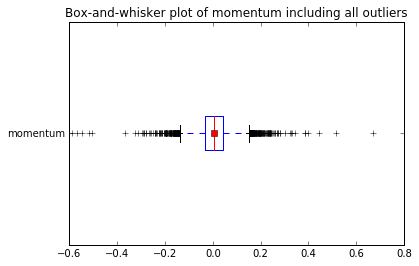

In [14]:
plt.boxplot(momentum.dropna().values,
    vert=False,
    labels=['momentum'],
    showmeans=True)
plt.title('Box-and-whisker plot of momentum including all outliers')
plt.show()

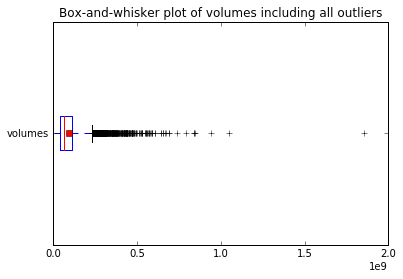

In [15]:
plt.boxplot(volumes.values,
    vert=False,
    labels=['volumes'],
    showmeans=True)
plt.title('Box-and-whisker plot of volumes including all outliers')
plt.show()

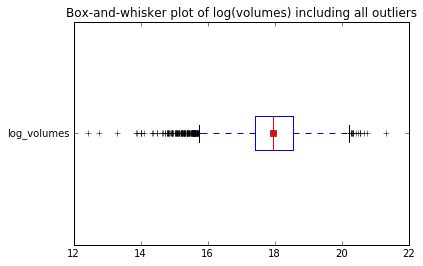

In [16]:
plt.boxplot(np.log(volumes).values,
    vert=False,
    labels=['log_volumes'],
    showmeans=True)
plt.title('Box-and-whisker plot of log(volumes) including all outliers')
plt.show()

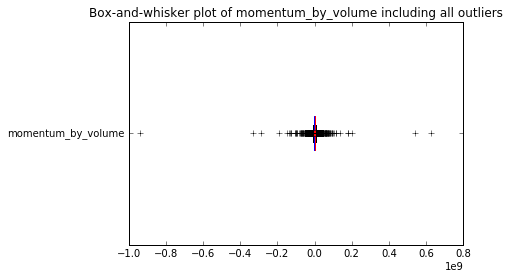

In [17]:
plt.boxplot(momentum_by_volume.dropna().values,
    vert=False,
    labels=['momentum_by_volume'],
    showmeans=True)
plt.title('Box-and-whisker plot of momentum_by_volume including all outliers')
plt.show()

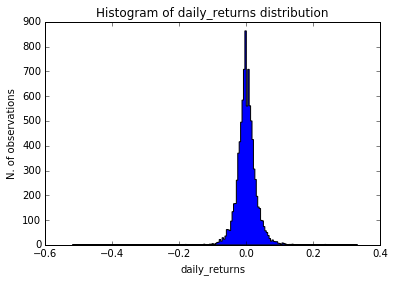

In [18]:
plt.hist(data['daily_returns'].dropna().values, bins=200, histtype='stepfilled')
plt.xlabel('daily_returns')
plt.ylabel('N. of observations')
plt.title('Histogram of daily_returns distribution')
plt.show()

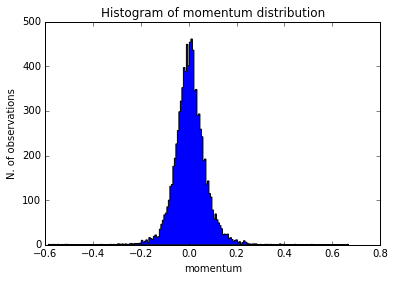

In [19]:
plt.hist(momentum.dropna().values, bins=200, histtype='stepfilled')
plt.xlabel('momentum')
plt.ylabel('N. of observations')
plt.title('Histogram of momentum distribution')
plt.show()

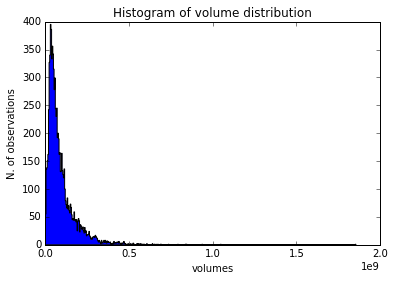

In [20]:
plt.hist(volumes.values, bins=500, histtype='stepfilled')
plt.xlabel('volumes')
plt.ylabel('N. of observations')
plt.title('Histogram of volume distribution')
plt.show()

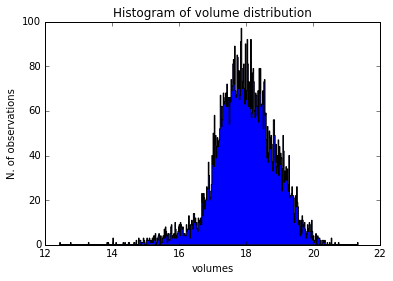

In [21]:
plt.hist(np.log(volumes).values, bins=500, histtype='stepfilled')
plt.xlabel('volumes')
plt.ylabel('N. of observations')
plt.title('Histogram of volume distribution')
plt.show()

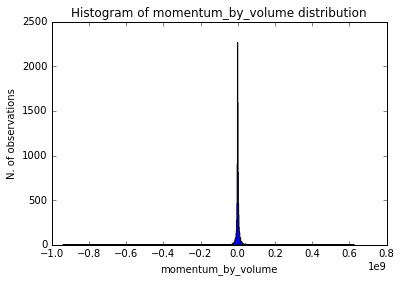

In [22]:
plt.hist(momentum_by_volume.dropna().values, bins=1000, histtype='stepfilled')
plt.xlabel('momentum_by_volume')
plt.ylabel('N. of observations')
plt.title('Histogram of momentum_by_volume distribution')
plt.show()

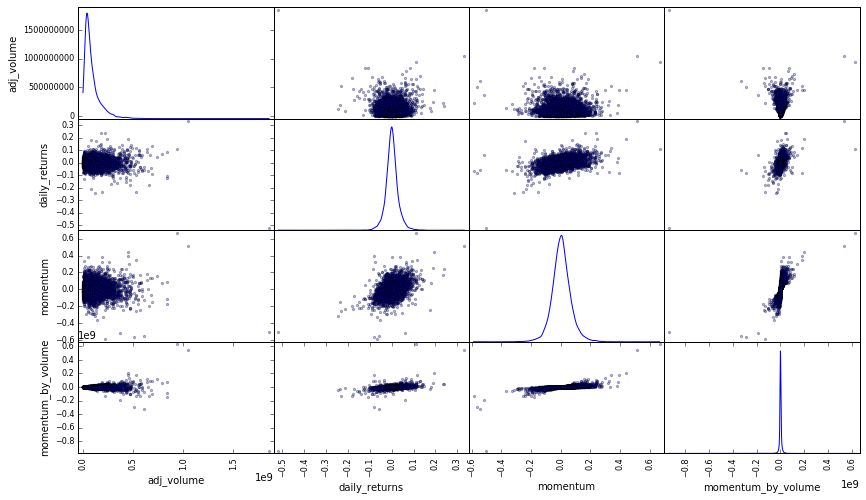

In [23]:
data_subset = data.loc[:, ['adj_volume',
                           'daily_returns',
                           'momentum',
                           'momentum_by_volume']] 

pd.scatter_matrix(data_subset, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

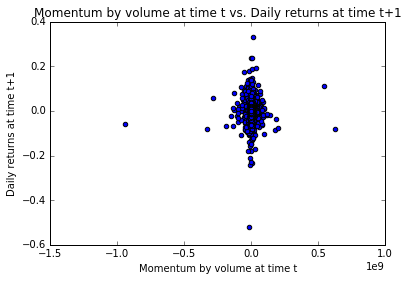

In [42]:
plt.scatter(momentum_by_volume, daily_returns.shift(-1))
plt.xlabel('Momentum by volume at time t')
plt.ylabel('Daily returns at time t+1')
plt.title('Momentum by volume at time t vs. Daily returns at time t+1')
plt.show()

In [25]:
# create master dataset
features = data[['adj_volume',
                 'momentum',
                 'momentum_by_volume',
                 'daily_returns']]
features.index = features.index.to_datetime()

# receive array of dates, return respective day of week
# 0 for monday, 1 for tuesday, ... , 6 for sunday
def weekdays(dates): 
    weekdays = []
    for date in dates:
        weekdays.append(date.weekday())
    return np.array(weekdays)

# return true if date in array is monday, false otherwise
def mondays(dates):
    mondays = dates[weekdays(dates) == 0]
    return mondays

def generate_sets(features, window_size=90, step_size=6):
    training_sets = []
    test_sets = []
    features.index = features.index.to_datetime()
    is_greater_than_window = mondays(features.index) > \
                             (mondays(features.index)[0] +
                              timedelta(days=window_size))
    mondays_range = mondays(features.index)[is_greater_than_window] 
    for monday in mondays_range:
        # slice training window
        train_window_start = monday - timedelta(days=window_size)
        train_window_end = monday - timedelta(days=1)
        train_window = features.loc[train_window_start:train_window_end]
        # slice test window
        test_window_end = monday + timedelta(days=step_size)
        test_window = features.loc[monday:test_window_end]
        # append training window to training_sets list
        training_sets.append(train_window)
        # append test window to test_sets list
        test_sets.append(test_window)
    return training_sets, test_sets

X_trains, X_tests = generate_sets(features.dropna())

In [26]:
display(X_trains[42].head())
display(X_trains[42].tail())
display(X_tests[42])


,adj_volume,momentum,momentum_by_volume,daily_returns
1981-11-03,7095200.0,0.019618,139193.391843,-0.012500
1981-11-04,5952800.0,-0.037500,-223230.000000,-0.025316
1981-11-05,5840800.0,-0.094684,-553027.645570,-0.071169
1981-11-06,6148800.0,-0.100000,-614880.000000,0.006711
1981-11-09,5096000.0,-0.087500,-445900.000000,0.013889


,adj_volume,momentum,momentum_by_volume,daily_returns
1982-01-25,11177600.0,-0.012267,-137114.818449,-0.029880
1982-01-26,5303200.0,-0.025164,-133447.408153,-0.037755
1982-01-27,7840000.0,-0.037037,-290370.370370,0.006711
1982-01-28,9900800.0,-0.023763,-235276.042677,0.032308
1982-01-29,13288800.0,-0.017831,-236956.915663,0.012419


,adj_volume,momentum,momentum_by_volume,daily_returns
1982-02-01,9632000.0,0.000000,0.000000,-0.012267
1982-02-02,13568800.0,0.045431,616445.224574,0.005961
1982-02-03,7868000.0,0.038462,302615.384615,0.000000
1982-02-04,5510400.0,-0.018877,-104021.460507,-0.024691
1982-02-05,10074400.0,-0.030913,-311426.496565,0.000000


In [27]:
def prune_training_outliers(df, coeff=1.5):
    result = pd.DataFrame(index=df.index)
    columns = range(0, df.shape[1])
    for i in columns:
        column = df[[i]].dropna()
        q3, q1 = np.percentile(column, [75, 25])
        iqr = q3 - q1
        outlier_lb = q1 - iqr * coeff
        outlier_ub = q3 + iqr * coeff
        is_below_lb = column < outlier_lb
        is_above_ub = column > outlier_ub
        # prune outliers by setting them equal to respectively lower or upper
        # bound 
        column[is_below_lb] = outlier_lb
        column[is_above_ub] = outlier_ub
        result = result.join(column)
    return result.dropna()


def prune_outliers(training_sets, test_sets, prune_coeff=1.5):
    pruned_training_sets = []
    pruned_test_sets = []
    for i in range(0, len(training_sets)):
        train_window = training_sets[i]
        test_window = test_sets[i]
        train_window = prune_training_outliers(training_sets[i],
                                               prune_coeff) 
        # prune outliers in test window
        # we treat the test set as an extension of the training set since at the
        # time of decision making not all values of the test set are known
        # therefore we substitute all values in test set smaller than min or
        # greater than max of pruned training set with max of pruned training
        # set itself instead of some computed upper bound on the test set
        is_to_prune_left = test_window < train_window.min()
        is_to_prune_right = test_window > train_window.max()
        is_to_prune = is_to_prune_left | is_to_prune_right
        # invert sign of is_to_prune to subset values to leave unchanged
        is_not_to_prune = abs(is_to_prune - 1)
        # create dataframe of same dimension as test window containing
        # pruned outliers and zeros everywhere else
        pruned_left = is_to_prune_left * train_window.min()
        pruned_right = is_to_prune_right * train_window.max()
        # create dataframe of same dimension as test window containing
        # non outliers and zeros intead of outliers
        non_outliers = is_not_to_prune * test_window
        # obtain test window with pruned outliers by summing non_outliers and
        # pruned_outliers  
        test_window = non_outliers + pruned_left + pruned_right
        pruned_training_sets.append(train_window)
        pruned_test_sets.append(test_window)
    return pruned_training_sets, pruned_test_sets

pruned_X_trains, pruned_X_tests = prune_outliers(X_trains, X_tests)

display(pruned_X_trains[42].head())
display(pruned_X_trains[42].tail())
display(pruned_X_tests[42])

,adj_volume,momentum,momentum_by_volume,daily_returns
1981-11-03,7095200.0,0.019618,139193.391843,-0.012500
1981-11-04,5952800.0,-0.037500,-223230.000000,-0.025316
1981-11-05,5840800.0,-0.094684,-553027.645570,-0.071169
1981-11-06,6148800.0,-0.100000,-614880.000000,0.006711
1981-11-09,5096000.0,-0.087500,-445900.000000,0.013889


,adj_volume,momentum,momentum_by_volume,daily_returns
1982-01-25,11177600.0,-0.012267,-137114.818449,-0.029880
1982-01-26,5303200.0,-0.025164,-133447.408153,-0.037755
1982-01-27,7840000.0,-0.037037,-290370.370370,0.006711
1982-01-28,9900800.0,-0.023763,-235276.042677,0.032308
1982-01-29,13288800.0,-0.017831,-236956.915663,0.012419


,adj_volume,momentum,momentum_by_volume,daily_returns
1982-02-01,9632000.0,0.000000,0.000000,-0.012267
1982-02-02,13568800.0,0.045431,616445.224574,0.005961
1982-02-03,7868000.0,0.038462,302615.384615,0.000000
1982-02-04,5510400.0,-0.018877,-104021.460507,-0.024691
1982-02-05,10074400.0,-0.030913,-311426.496565,0.000000


In [28]:
def scale_features(training_sets, test_sets):
    scaled_training_sets = []
    scaled_test_sets = []
    for i in range(0, len(training_sets)):
        train_window = training_sets[i]
        test_window = test_sets[i]
        # since we don't want to normalize the test set data on their own, but
        # rather as if they were part of the training set, we implement the 
        # minmax scaler manually subtracting min of training from each value of
        # test_window and dividing by range of training set (max - min)
        test_window_values = (test_window - train_window.min()) / \
                             (train_window.max() - train_window.min())
        test_window = pd.DataFrame(test_window_values,
                                   test_window.index,
                                   test_window.columns)
        # we normalize test window before training window otherwise min and max
        # values from training window used to scale test window would be 0 and 1
        train_window_values = preprocessing.MinMaxScaler().fit_transform(train_window)
        train_window = pd.DataFrame(train_window_values,
                                    train_window.index,
                                    train_window.columns)
        scaled_training_sets.append(train_window)
        scaled_test_sets.append(test_window)
    return scaled_training_sets, scaled_test_sets

scaled_X_trains, scaled_X_tests = scale_features(X_trains, X_tests)

display(scaled_X_trains[42].head())
display(scaled_X_trains[42].tail())
display(scaled_X_tests[42])

,adj_volume,momentum,momentum_by_volume,daily_returns
1981-11-03,0.096558,0.463376,0.407667,0.408710
1981-11-04,0.058605,0.310209,0.351187,0.329421
1981-11-05,0.054884,0.156868,0.299791,0.045754
1981-11-06,0.065116,0.142611,0.290152,0.527562
1981-11-09,0.030140,0.176131,0.316486,0.571966


,adj_volume,momentum,momentum_by_volume,daily_returns
1982-01-25,0.232186,0.377874,0.364607,0.301191
1982-01-26,0.037023,0.343291,0.365179,0.252472
1982-01-27,0.121302,0.311451,0.340724,0.527562
1982-01-28,0.189767,0.347045,0.349310,0.685914
1982-01-29,0.302326,0.362953,0.349048,0.562874


,adj_volume,momentum,momentum_by_volume,daily_returns
1982-02-01,0.180837,0.410769,0.385975,0.410152
1982-02-02,0.311628,0.532595,0.482042,0.522921
1982-02-03,0.122233,0.513906,0.433135,0.486042
1982-02-04,0.043907,0.360148,0.369764,0.333288
1982-02-05,0.195535,0.327874,0.337442,0.486042


In [29]:
# label based on sign the the return on the following day
labels = np.sign(features['daily_returns'].shift(-1))
labels.index = labels.index.to_datetime()

# function takes as input a model, a list of training sets, a list of test sets
# and the labels
def run_model(model, X_trains, X_tests, ys):
    model = model
    accuracies = []
    accuracies_ix = []
    pnl = []
    for i in range(13, len(X_trains)):
        X_train = X_trains[i]
        X_test = X_tests[i]
        y = ys[X_train.index]
        model.fit(X_train, y)
        y_true = ys[X_test.index].values
        y_pred = model.predict(X_test)
        actual_returns = features['daily_returns'].loc[X_test.index]
        window_pnl = y_pred * actual_returns
        accuracy = metrics.accuracy_score(y_true, y_pred)
        accuracies.append(accuracy)
        accuracies_ix.append(X_test.index[0])
        pnl.append(window_pnl)
    accuracies = pd.DataFrame(accuracies, accuracies_ix, ['accuracy'])
    pnl = pd.DataFrame(pd.concat(pnl))
    pnl.columns = ['pnl']
    return accuracies, pnl


def evaluate(pnl):
    pnl = pnl.iloc[:, 0]
    final_pnl = pnl.sum()
    # avg annual return = avg daily return * number of trading days in a year
    avg_annual_return = pnl.mean() * 252
    # avg annual std = daily std * sqrt(number of trading days in a year)
    # we take the sqrt because
    # std = sqrt(variance)
    # annual variance = daily variance * 252
    # annual std = sqrt(annual variance)
    #            = sqrt(daily variance * 252)
    #            = sqrt(daily variance) * sqrt(252)
    #            = daily std * sqrt(252)
    annual_std = pnl.std() * np.sqrt(252)
    cum_ret = np.cumsum(pnl)
    drawdowns = np.maximum.accumulate(cum_ret) - cum_ret
    max_drawdown_valley = np.argmax(drawdowns)
    max_drawdown_peak = np.argmax(cum_ret[:max_drawdown_valley])
    max_drawdown = np.max(drawdowns)
    avg_drawdown = np.mean(drawdowns)
    median_drawdown = np.median(drawdowns)
    q3_drawdown = np.percentile(drawdowns, 75)
    # remember to compute recovery time from drawdowns
    # risk-adjusted return measures
    # all such measures are annualized here
    # information ratio = sharpe ratio without taking risk-free rate into account
    # using Narang's definition here, not Balch's - hence ignoring beta
    information_ratio = avg_annual_return / annual_std
    # sterling ratio = avg return / std of below average returns
    below_avg_returns = pnl[pnl < pnl.mean()]
    annual_below_avg_returns_std = below_avg_returns.std() * np.sqrt(252)
    sterling_ratio = avg_annual_return / annual_below_avg_returns_std
    # sterling_ratio = sterling_ratio.values[0]
    # adjusted sterling ratio = avg return / std of negative returns
    negative_returns = pnl[pnl < 0]
    annual_negative_returns_std = negative_returns.std() * np.sqrt(252)
    adjusted_sterling_ratio = avg_annual_return / annual_negative_returns_std
    # adjusted_sterling_ratio = adjusted_sterling_ratio.values[0] 
    calmar_ratio = avg_annual_return / max_drawdown
    # omega ratio = sum of all positive returns / sum of all negative returns
    positive_returns = pnl[pnl > 0]
    omega_ratio = positive_returns.sum() / np.abs(negative_returns.sum())
    # omega_ratio = omega_ratio.values[0]
    metrics_values = [final_pnl, avg_annual_return, annual_std, max_drawdown,
                      avg_drawdown, median_drawdown, information_ratio,
                      sterling_ratio, adjusted_sterling_ratio, calmar_ratio,
                      omega_ratio]
    metrics_labels = ['final_pnl', 'avg_annual_return', 'annual_std',
                      'max_drawdown', 'avg_drawdown', 'median_drawdown',
                      'information_ratio', 'sterling_ratio',
                      'adjusted_sterling_ratio', 'calmar_ratio', 'omega_ratio']
    metrics_df = pd.DataFrame(metrics_values, metrics_labels, ['value'])
    return metrics_df

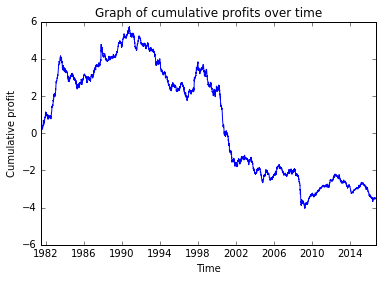

,value
final_pnl,-3.501837
avg_annual_return,-0.106887
annual_std,0.461823
max_drawdown,9.790603
avg_drawdown,4.521957
median_drawdown,3.450501
information_ratio,-0.231447
sterling_ratio,-0.310640
adjusted_sterling_ratio,-0.310618
calmar_ratio,-0.010917


In [38]:
# run logistic regression 
accuracy_lr, pnl_lr = run_model(linear_model.LogisticRegression(),
                                scaled_X_trains,
                                scaled_X_tests,
                                labels) 

# plot graph of cumulative profits with logistic regression model
plt.plot(np.cumsum(pnl_lr))
plt.title('Graph of cumulative profits over time')
plt.xlabel('Time')
plt.ylabel('Cumulative profit')
plt.show()
display(evaluate(pnl_lr))

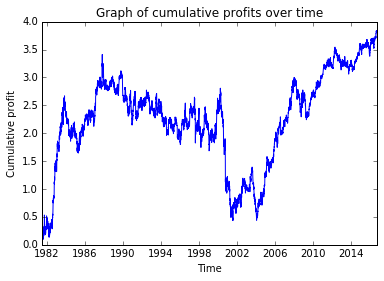

,value
final_pnl,3.821081
avg_annual_return,0.116632
annual_std,0.470936
max_drawdown,2.976204
avg_drawdown,0.942026
median_drawdown,0.813338
information_ratio,0.247659
sterling_ratio,0.324711
adjusted_sterling_ratio,0.322119
calmar_ratio,0.039188


In [39]:
# run support vector machines
accuracy_svm, pnl_svm = run_model(svm.SVC(),
                                  scaled_X_trains,
                                  scaled_X_tests,
                                  labels) 

# plot graph of cumulative profits with support vector machine model
plt.plot(np.cumsum(pnl_svm))
plt.title('Graph of cumulative profits over time')
plt.xlabel('Time')
plt.ylabel('Cumulative profit')
plt.show()
display(evaluate(pnl_svm))

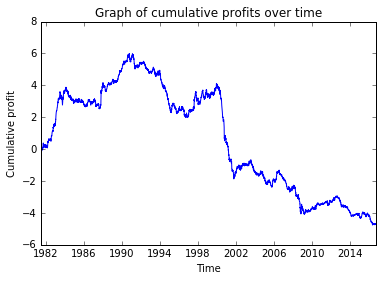

,value
final_pnl,-4.675051
avg_annual_return,-0.142698
annual_std,0.467915
max_drawdown,10.751041
avg_drawdown,4.651051
median_drawdown,3.520587
information_ratio,-0.304965
sterling_ratio,-0.403129
adjusted_sterling_ratio,-0.403224
calmar_ratio,-0.013273


In [40]:
# run nearest neighbor classifier
accuracy_knn, pnl_knn = run_model(neighbors.KNeighborsClassifier(),
                                  scaled_X_trains,
                                  scaled_X_tests,
                                  labels) 

# plot graph of cumulative profits with nearest neighbors model
plt.plot(np.cumsum(pnl_knn))
plt.title('Graph of cumulative profits over time')
plt.xlabel('Time')
plt.ylabel('Cumulative profit')
plt.show()
display(evaluate(pnl_knn))

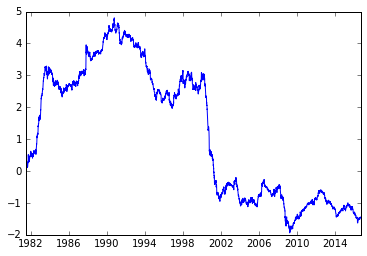

,value
final_pnl,-1.451936
avg_annual_return,-0.044318
annual_std,0.363038
max_drawdown,6.742739
avg_drawdown,3.129437
median_drawdown,2.422371
information_ratio,-0.122075
sterling_ratio,-0.149576
adjusted_sterling_ratio,-0.149743
calmar_ratio,-0.006573


In [33]:
# compute ensemble pnl
pnl_ensemble = (pnl_lr + pnl_svm + pnl_knn) / 3

# plot graph of cumulative profits with ensemble model
plt.plot(np.cumsum(pnl_ensemble))
plt.show()
display(evaluate(pnl_ensemble))

In [34]:
Cs = [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
grid_search_result = pd.DataFrame(index=evaluate(pnl_lr).index,
                                  columns=Cs)

for i, C in enumerate(Cs):
    print "Currently computing metrics with C parameter: {}".format(C)
    accuracy_lr, pnl_lr = run_model(linear_model.LogisticRegression(C=C),
                                    scaled_X_trains,
                                    scaled_X_tests,
                                    labels) 
    grid_search_result.iloc[:, i] = evaluate(pnl_lr).values

display(grid_search_result)
    

Currently computing metrics with C parameter: 0.003
Currently computing metrics with C parameter: 0.01
Currently computing metrics with C parameter: 0.03
Currently computing metrics with C parameter: 0.1
Currently computing metrics with C parameter: 0.3
Currently computing metrics with C parameter: 1
Currently computing metrics with C parameter: 3
Currently computing metrics with C parameter: 10
Currently computing metrics with C parameter: 30


,0.003,0.01,0.03,0.1,0.3,1.0,3.0,10.0,30.0
final_pnl,6.200699,6.314043,4.639046,3.423428,0.190337,-3.501837,-5.258325,-5.652803,-4.864492
avg_annual_return,0.189266,0.192725,0.141599,0.104494,0.005810,-0.106887,-0.160501,-0.172542,-0.148480
annual_std,0.458845,0.458839,0.458913,0.461773,0.461683,0.461823,0.461712,0.460757,0.457595
max_drawdown,1.025483,1.025483,1.467872,2.245672,5.105802,9.790603,13.892923,17.140712,18.014656
avg_drawdown,0.346136,0.340434,0.525669,0.877561,2.542680,4.521957,6.099047,7.546611,7.685745
median_drawdown,0.322831,0.314478,0.531855,0.750591,2.777960,3.450501,4.528770,5.680660,5.026287
information_ratio,0.412483,0.420028,0.308553,0.226289,0.012584,-0.231447,-0.347622,-0.374475,-0.324479
sterling_ratio,0.587816,0.598880,0.435075,0.317740,0.017122,-0.310640,-0.479606,-0.517757,-0.436336
adjusted_sterling_ratio,0.587237,0.598273,0.434483,0.317234,0.017082,-0.310618,-0.479395,-0.517511,-0.436286
calmar_ratio,0.184562,0.187936,0.096465,0.046531,0.001138,-0.010917,-0.011553,-0.010066,-0.008242


In [35]:
Cs = [0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
grid_search_result = pd.DataFrame(index=evaluate(pnl_svm).index,
                                  columns=Cs)

for i, C in enumerate(Cs):
    print "Currently computing metrics with C parameter: {}".format(C)
    accuracy_svm, pnl_svm = run_model(svm.SVC(C=C),
                                      scaled_X_trains,
                                      scaled_X_tests,
                                      labels) 
    grid_search_result.iloc[:, i] = evaluate(pnl_svm).values

display(grid_search_result)

Currently computing metrics with C parameter: 0.03
Currently computing metrics with C parameter: 0.1
Currently computing metrics with C parameter: 0.3
Currently computing metrics with C parameter: 1
Currently computing metrics with C parameter: 3
Currently computing metrics with C parameter: 10
Currently computing metrics with C parameter: 30
Currently computing metrics with C parameter: 100
Currently computing metrics with C parameter: 300


,0.03,0.1,0.3,1.0,3.0,10.0,30.0,100.0,300.0
final_pnl,6.293051,6.293051,6.293051,3.821081,-2.883325,-2.968487,-2.312592,-2.749267,-1.139943
avg_annual_return,0.192084,0.192084,0.192084,0.116632,-0.088008,-0.090608,-0.070588,-0.083917,-0.034795
annual_std,0.470838,0.470838,0.470838,0.470936,0.470826,0.470388,0.469877,0.468307,0.466627
max_drawdown,1.414960,1.414960,1.414960,2.976204,8.722635,11.552959,13.778763,14.414113,12.018543
avg_drawdown,0.399484,0.399484,0.399484,0.942026,4.308326,5.226166,6.213377,6.872960,5.363495
median_drawdown,0.393733,0.393733,0.393733,0.813338,3.419751,3.765727,4.908952,5.743350,3.989287
information_ratio,0.407963,0.407963,0.407963,0.247659,-0.186924,-0.192624,-0.150226,-0.179191,-0.074567
sterling_ratio,0.538511,0.538511,0.538511,0.324711,-0.238152,-0.248875,-0.207880,-0.244876,-0.102271
adjusted_sterling_ratio,0.533690,0.533690,0.533690,0.322119,-0.238266,-0.248968,-0.207862,-0.244867,-0.102271
calmar_ratio,0.135752,0.135752,0.135752,0.039188,-0.010090,-0.007843,-0.005123,-0.005822,-0.002895


In [36]:
n_neighbors = [3, 6, 10, 15, 21, 28, 36, 45]
grid_search_result = pd.DataFrame(index=evaluate(pnl_knn).index,
                                  columns=n_neighbors)

for i, n_neighbors in enumerate(n_neighbors):
    print "Currently computing metrics with n_neighbors parameter: {}".format(n_neighbors)
    accuracy_knn, pnl_knn = run_model(neighbors.KNeighborsClassifier(n_neighbors=n_neighbors),
                                      scaled_X_trains,
                                      scaled_X_tests,
                                      labels) 
    grid_search_result.iloc[:, i] = evaluate(pnl_knn).values

display(grid_search_result)

Currently computing metrics with n_neighbors parameter: 3
Currently computing metrics with n_neighbors parameter: 6
Currently computing metrics with n_neighbors parameter: 10
Currently computing metrics with n_neighbors parameter: 15
Currently computing metrics with n_neighbors parameter: 21
Currently computing metrics with n_neighbors parameter: 28
Currently computing metrics with n_neighbors parameter: 36
Currently computing metrics with n_neighbors parameter: 45


,3,6,10,15,21,28,36,45
final_pnl,-5.913974,-4.913612,-2.869938,-4.157838,-5.157750,-2.213432,-1.953592,2.556952
avg_annual_return,-0.180514,-0.149979,-0.087600,-0.126911,-0.157431,-0.067561,-0.059630,0.078047
annual_std,0.467741,0.469761,0.470720,0.470871,0.470866,0.470951,0.470979,0.470968
max_drawdown,12.201451,11.226033,13.277474,13.666844,14.165079,11.718562,9.790259,4.821096
avg_drawdown,5.577648,5.048964,5.555892,5.796785,5.824225,4.782467,4.123290,2.133411
median_drawdown,4.349392,2.903445,3.279644,3.950629,3.347018,2.467348,2.535775,1.886670
information_ratio,-0.385927,-0.319268,-0.186098,-0.269523,-0.334344,-0.143457,-0.126609,0.165715
sterling_ratio,-0.510367,-0.423724,-0.247660,-0.386052,-0.443232,-0.189349,-0.166745,0.218424
adjusted_sterling_ratio,-0.510610,-0.423834,-0.247707,-0.385890,-0.443378,-0.189386,-0.166776,0.216960
calmar_ratio,-0.014794,-0.013360,-0.006598,-0.009286,-0.011114,-0.005765,-0.006091,0.016189
